# Quantity Prediction

Nama : Fauziya Alya Ramadhana

# Use Case

* **Tujuan** :

    * Membangun model machine learning untuk memprediksi quantity
    * Membandingkan model terbaik
    
    
* **Tantangan** :
    * Data yang besar, tidak dapat diolah menggunakan excel
    * Membuat prediksi quantity dalam 6 bulan kedepan


* **Metodologi** :
    * Analisis Deskriptif
        * Mean, max/min, kuartil, varians, count
    * Analisis Grafik
        * Boxplot
        * Histogram
        * Correlation Plot
        * Pie Chart
        * Bar Chart
        * Line Chart
        * Stacked Bar Chart
    * Model yang digunakan
        * Regresi Linear
        * Regresi Ridge
        * Regresi Lasso
        * Decision Tree Regressor
        * Regresi XGBoost

# Business Understanding
Data ini memiliki beberapa pertanyaan bisnis yaitu:
- Bagaimana deskripsi data tersebut?
- Bagaimana distribusi data Sales, Profit, dan Quantity?
- Berapa banyak customer yang pernah melakukan order pesanan?
- Variabel apa yang paling berhubungan Quantity?
- Region mana yang paling sering mendapatkan orderan?
- Ship Mode apa yang paling sering digunakan?
- Kategori produk apa yang paling besar kontribusinya dalam profit perusahaan?
- Bagaimana perbandingan Sales dan Profit setiap bulannya?
- Sub Category apa yang paling banyak diorder?
- Berapa hari waktu yang dibutuhkan untuk packing orderan?
- Apa model yang cocok diaplikasikan untuk memprediksi Quantity?

# Data Understanding


* **Sumber Data**:
    * Dataset dari Kaggle.com
    * Data terdiri dari 9994 baris dan 21 kolom
    
    
* **Deskripsi Variabel** :

    * Order ID : ID untuk setiap pesanan yang dilakukan.

    * Order Date : Tanggal ketika pesanan dilakukan.

    * Ship Date : Tanggal pengiriman barang pesanan.

    * Ship Mode : Mode pengiriman yang dipilih untuk pesanan.

    * Customer ID : ID untuk setiap pelanggan.

    * Customer Name : Nama pelanggan yang melakukan pemesanan.

    * Segment : Segmen pasar tempat pelanggan berada.

    * Country : Negara tempat pemesanan dilakukan.

    * City : Kota tempat pesanan dilakukan.

    * State : Negara bagian di dalam negara tempat pesanan dilakukan.

    * Postal Code : Kode pos yang terkait dengan lokasi pesanan.

    * Region : Wilayah negara tempat pesanan dilakukan.

    * Product ID : ID untuk setiap produk.

    * Category : Kategori produk.

    * Sub-Category : Sub-kategori spesifik dari produk.

    * Product Name : Nama produk yang dipesan.

    * Sales : Biaya yang diperoleh saat penjualan.
    
    * Quantity : Jumlah barang pesanan.
    
    * Discount : Diskon yag diberikan.
    
    * Profit : Biaya keuntungan bersih.

#### Import Packages

In [1]:
#pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import xgboost
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import kstest

import warnings
warnings.filterwarnings("ignore")

# Data Profiling

#### Import dataset

In [3]:
df = pd.read_excel("superstore.xlsm")

#### Preview Dataset

In [4]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,114,CA-2014-115259,2014-08-25,2014-08-27,Second Class,RC-19960,Ryan Crowe,Consumer,United States,Columbus,...,43229,East,OFF-FA-10000621,Office Supplies,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",40.096,14,0.2,14.5348
1,140,CA-2016-145583,2016-10-13,2016-10-19,Standard Class,LC-16885,Lena Creighton,Consumer,United States,Roseville,...,95661,West,FUR-FU-10001706,Furniture,Furnishings,Longer-Life Soft White Bulbs,43.120,14,0.0,20.6976
2,576,CA-2015-149713,2015-09-18,2015-09-22,Second Class,TG-21640,Trudy Glocke,Consumer,United States,Long Beach,...,90805,West,OFF-PA-10004530,Office Supplies,Paper,Personal Creations Ink Jet Cards and Labels,160.720,14,0.0,78.7528
3,661,CA-2015-146563,2015-08-24,2015-08-28,Standard Class,CB-12025,Cassandra Brandow,Consumer,United States,Arlington,...,76017,Central,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,724.080,14,0.2,-135.7650
4,1046,CA-2017-152702,2017-10-12,2017-10-16,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Rockford,...,61107,Central,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",254.604,14,0.3,-18.1860
5,1364,US-2017-155425,2017-11-10,2017-11-11,First Class,AB-10600,Ann Blume,Corporate,United States,Tucson,...,85705,West,OFF-BI-10001036,Office Supplies,Binders,Cardinal EasyOpen D-Ring Binders,38.388,14,0.7,-25.5920
6,1430,US-2015-164448,2015-10-31,2015-11-04,Second Class,DK-12835,Damala Kotsonis,Corporate,United States,Salinas,...,93905,West,OFF-LA-10003510,Office Supplies,Labels,Avery 4027 File Folder Labels for Dot Matrix P...,427.420,14,0.0,196.6132
7,1434,CA-2014-120768,2014-12-19,2014-12-21,Second Class,IM-15070,Irene Maddox,Consumer,United States,Florence,...,35630,South,FUR-CH-10000513,Furniture,Chairs,High-Back Leather Manager's Chair,1819.860,14,0.0,163.7874
8,1712,CA-2017-123491,2017-10-30,2017-11-05,Standard Class,JK-15205,Jamie Kunitz,Consumer,United States,San Francisco,...,94122,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",1702.120,14,0.0,510.6360
9,2794,CA-2014-154599,2014-04-12,2014-04-17,Standard Class,KN-16450,Kean Nguyen,Corporate,United States,Redondo Beach,...,90278,West,TEC-PH-10001557,Technology,Phones,Pyle PMP37LED,1075.088,14,0.2,94.0702


#### Informasi Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

#### Ukuran data

In [6]:
df.shape

(9994, 21)

# Preprocessing Data

#### Mengubah tipe data

In [7]:
df['Postal Code']=df['Postal Code'].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

#### Cek missing value

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

* Tidak terdapat missing value pada data

#### Membuat kolom baru berisi tahun, bulan, dan tanggal order

In [10]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name()
df['Order Day'] = df['Order Date'].dt.day
df['Order Month Year'] = df['Order Month'].astype(str) + '-' + df['Order Year'].astype(str)
df['Order Month Year'] = pd.to_datetime(df['Order Month Year'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID            9994 non-null   int64         
 1   Order ID          9994 non-null   object        
 2   Order Date        9994 non-null   datetime64[ns]
 3   Ship Date         9994 non-null   datetime64[ns]
 4   Ship Mode         9994 non-null   object        
 5   Customer ID       9994 non-null   object        
 6   Customer Name     9994 non-null   object        
 7   Segment           9994 non-null   object        
 8   Country           9994 non-null   object        
 9   City              9994 non-null   object        
 10  State             9994 non-null   object        
 11  Postal Code       9994 non-null   object        
 12  Region            9994 non-null   object        
 13  Product ID        9994 non-null   object        
 14  Category          9994 n

#### Menambahkan kolom waktu yang dibutuhkan untuk packing barang pesanan

In [12]:
df['Packing Time']=df['Ship Date']-df['Order Date']
df['Packing Time']=df['Packing Time'].dt.days
df['Packing Time'].head(5)

0    2
1    6
2    4
3    4
4    4
Name: Packing Time, dtype: int64

#### Menghapus kolom Row ID

In [13]:
df=df.drop(['Row ID'], axis=1)

In [14]:
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Month Year,Packing Time
0,CA-2014-115259,2014-08-25,2014-08-27,Second Class,RC-19960,Ryan Crowe,Consumer,United States,Columbus,Ohio,...,"OIC Colored Binder Clips, Assorted Sizes",40.096,14,0.2,14.5348,2014,August,25,2014-08-01,2
1,CA-2016-145583,2016-10-13,2016-10-19,Standard Class,LC-16885,Lena Creighton,Consumer,United States,Roseville,California,...,Longer-Life Soft White Bulbs,43.120,14,0.0,20.6976,2016,October,13,2016-10-01,6
2,CA-2015-149713,2015-09-18,2015-09-22,Second Class,TG-21640,Trudy Glocke,Consumer,United States,Long Beach,California,...,Personal Creations Ink Jet Cards and Labels,160.720,14,0.0,78.7528,2015,September,18,2015-09-01,4
3,CA-2015-146563,2015-08-24,2015-08-28,Standard Class,CB-12025,Cassandra Brandow,Consumer,United States,Arlington,Texas,...,Space Solutions Commercial Steel Shelving,724.080,14,0.2,-135.7650,2015,August,24,2015-08-01,4
4,CA-2017-152702,2017-10-12,2017-10-16,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Rockford,Illinois,...,"Global Stack Chair without Arms, Black",254.604,14,0.3,-18.1860,2017,October,12,2017-10-01,4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          9994 non-null   object        
 1   Order Date        9994 non-null   datetime64[ns]
 2   Ship Date         9994 non-null   datetime64[ns]
 3   Ship Mode         9994 non-null   object        
 4   Customer ID       9994 non-null   object        
 5   Customer Name     9994 non-null   object        
 6   Segment           9994 non-null   object        
 7   Country           9994 non-null   object        
 8   City              9994 non-null   object        
 9   State             9994 non-null   object        
 10  Postal Code       9994 non-null   object        
 11  Region            9994 non-null   object        
 12  Product ID        9994 non-null   object        
 13  Category          9994 non-null   object        
 14  Sub-Category      9994 n

# Data Exploration

In [16]:
df.describe()

,Sales,Quantity,Discount,Profit,Order Year,Order Day,Packing Time
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,2015.722233,15.468481,3.958175
std,623.245101,2.225110,0.206452,234.260108,1.123555,8.748327,1.747567
min,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,0.000000
25%,17.280000,2.000000,0.000000,1.728750,2015.000000,8.000000,3.000000
50%,54.490000,3.000000,0.200000,8.666500,2016.000000,15.000000,4.000000
75%,209.940000,5.000000,0.200000,29.364000,2017.000000,23.000000,5.000000
max,22638.480000,14.000000,0.800000,8399.976000,2017.000000,31.000000,7.000000


* Rata-rata jumlah barang pesanan yang dibeli setiap kali terdapat transaksi yaitu sebanyak 4 barang dengan diskon rata-rata 20% untuk setiap transaksi.
* Pembelian barang terbanyak adalah sebesar 14 barang
* 50% transaksi/orderan yang masuk, menghasilkan profit kurang dari sama dengan 8,667 dan profit paling tinggi yang pernah di peroleh sebesar 8399,976
* Rata-rata waktu packing barang untuk setiap orderan/transaksi adalah sebesar 3 hari

In [17]:
df.describe(exclude = np.number)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Order Month,Order Month Year
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.0,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,631.0,4,1862,3,17,1850,12,48
top,CA-2017-100111,2016-09-05 00:00:00,2015-12-16 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,10035.0,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,November,2017-12-01 00:00:00
freq,14,38,35,5968,37,37,5191,9994,915,2001,263.0,3203,19,6026,1523,48,1471,462
first,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:00:00
last,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-01 00:00:00


* Dalam 1237 hari, terdapat 793 customer yang melakukan pesanan dari 531 Kota yang berbeda-beda dan terdapat total 1862 barang yang dipesan. Pengiriman barang terjadi selama 1334 hari.

#### Bagaimana distribusi data Sales, Profit, dan Quantity?

Sales              AxesSubplot(0.125,0.747241;0.133621x0.132759)
Quantity        AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Discount         AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Profit          AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Order Year      AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Order Day          AxesSubplot(0.125,0.587931;0.133621x0.132759)
Packing Time    AxesSubplot(0.285345,0.587931;0.133621x0.132759)
dtype: object

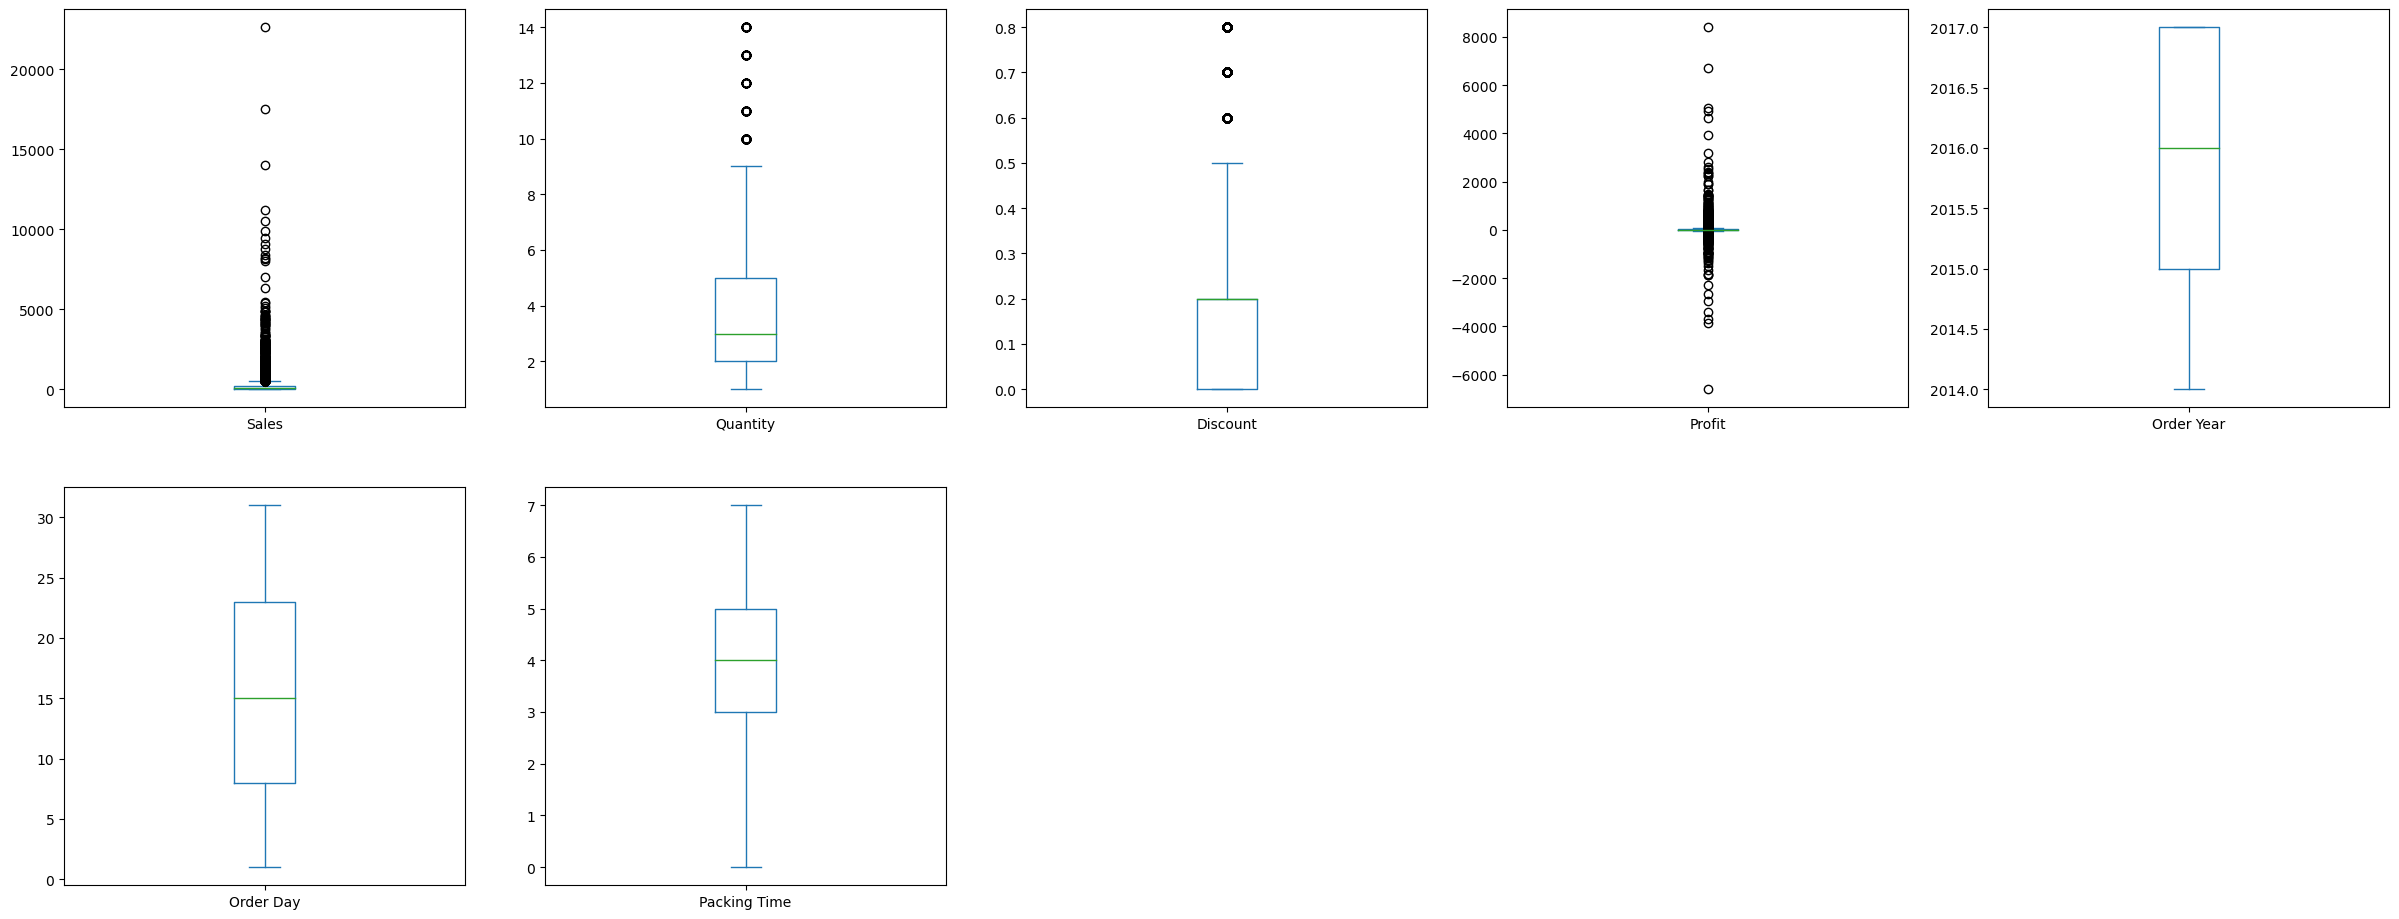

In [18]:
df.plot(kind='box', subplots=True, figsize=(30,30), layout=(5,5))

* Nilai Sales dan Profit menunjukkan banyaknya outlier pada data
* Untuk data Quantity, terdapat data outlier namun tidak banyak

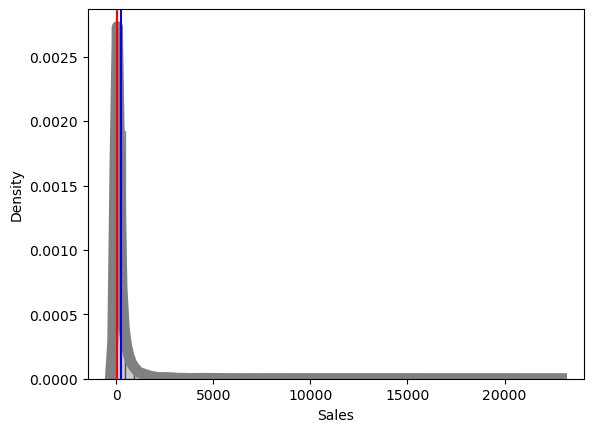

In [19]:
## Sales
sns.distplot(df['Sales'], hist=True, kde= True, color  ='grey',
            hist_kws= {'edgecolor':'black'},
            kde_kws= {'linewidth':8})
plt.axvline(df['Sales'].mean(), color='blue')
plt.axvline(df['Sales'].median(), color='red')

* Histogram Sales menunjukkan data skew ke kanan. Sehingga data banyak tersebar di bagian kiri. Artinya banyak transaksi yang terjadi menghasilkan nilai sales yang kecil.

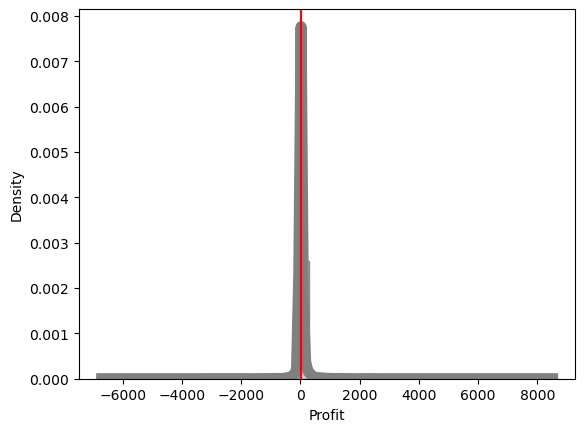

In [20]:
## Profit
sns.distplot(df['Profit'], hist=True, kde= True, color  ='grey',
            hist_kws= {'edgecolor':'black'},
            kde_kws= {'linewidth':8})
plt.axvline(df['Profit'].mean(), color='blue')
plt.axvline(df['Profit'].median(), color='red')

* Histogram profit juga menunjukkan banyak outlier pada data ditunjukkan dengan bentuk kurva yang cenderung berbentuk leptokurtik.

#### Variabel apa yang paling berhubungan Quantity?

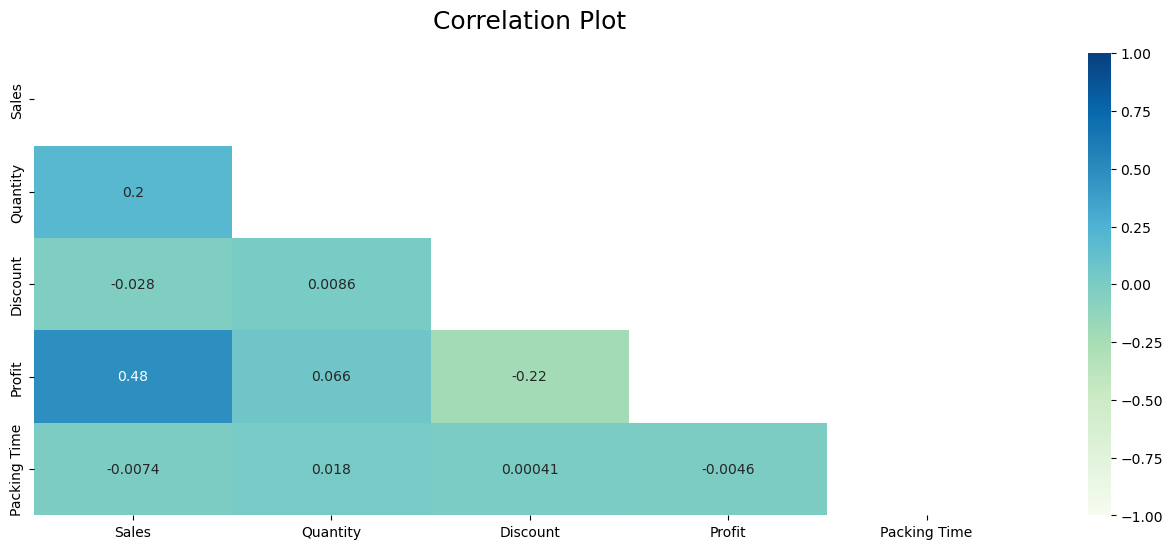

In [21]:
#Correlation Plot
df2=df[['Sales','Quantity','Discount','Profit','Packing Time']]

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(df2.corr(), mask=mask,vmin=-1, vmax=1, annot=True, cmap='GnBu')
heatmap.set_title('Correlation Plot', fontdict={'fontsize':18}, pad=18)
plt.show()

Berdasarkan hasil nilai korelasi pearson :
* Diskon dengan sales, sales dengan packing time, diskon dengan packing time, dan diskon dengan profit berkorelasi negatif.
* Semakin besar diskon yang diberikan maka semakin kecil sales yang didapatkan serta semakin besar diskon yang diberikan maka semakin kecil profit yang diperoleh
* Nilai korelasi terbesar adalah sales dengan profit. Sehingga dapat dikatakan sales dan profit sangat berhubungan.
* Nilai korelasi terkecil adalah quantity dengan diskon. sehingga quantity dengan diskon dapat dikatakan tidak berhubungan.
* Variabel yang paling berkorelasi dengan Quantity adalah Sales

#### Region mana yang paling sering mendapatkan orderan?

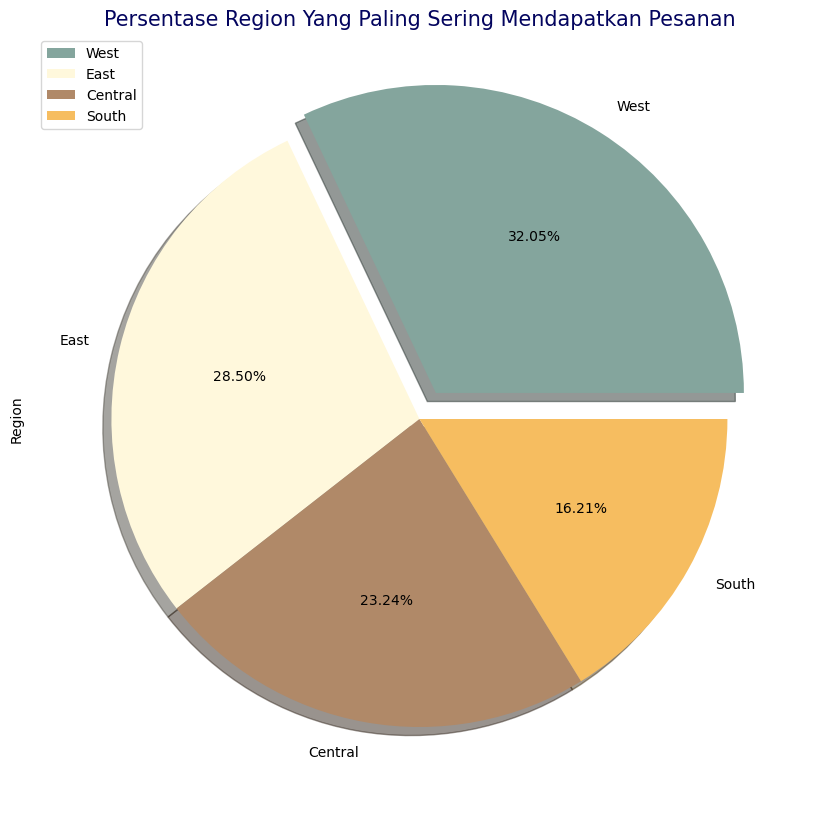

In [22]:
plt.figure(figsize=(10, 10))
colors = ('#84a59d', '#FFF8DC', '#b08968','#f6bd60', '#f5cac3', '#8ecae6')
explode = (0.1, 0, 0, 0)
Type=df['Region'].value_counts()
Type.plot.pie(autopct='%.2f%%',shadow=True,colors=colors, legend=True, explode=explode)
plt.title('Persentase Region Yang Paling Sering Mendapatkan Pesanan', fontsize=15, color="#03045e")

plt.show()

* region paling banyak mendapatkan pesanan adalah di region West dan yang paling sedikit adalah di region South

#### Ship Mode apa yang paling sering digunakan?

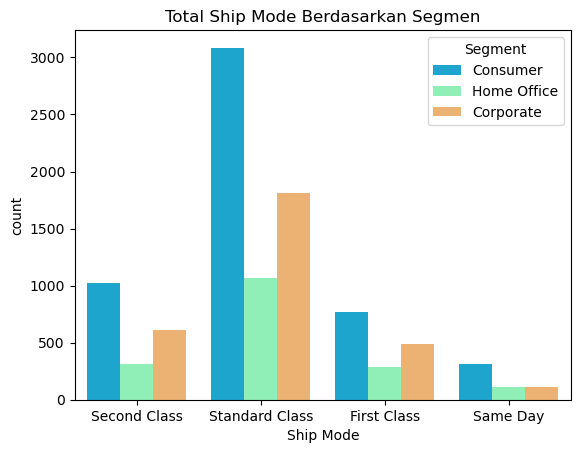

In [23]:
sns.countplot(x=df['Ship Mode'],hue=df['Segment'], palette='rainbow')
plt.title('Total Ship Mode Berdasarkan Segmen')
plt.show()

* Standard Class menjadi jenis pengiriman paling diminati baik dari segmen consumer, home office, dan corporate sedangkan untuk jenis pengiriman barang yang kurang diminati adalah same day
* Dari sini juga dapat dilihat bahwa segment yang paling banyak melakukan orderan adalah segment consumer dan yang paling sedikit adalah segment home office

#### Kategori produk apa yang paling besar kontribusinya dalam profit perusahaan?

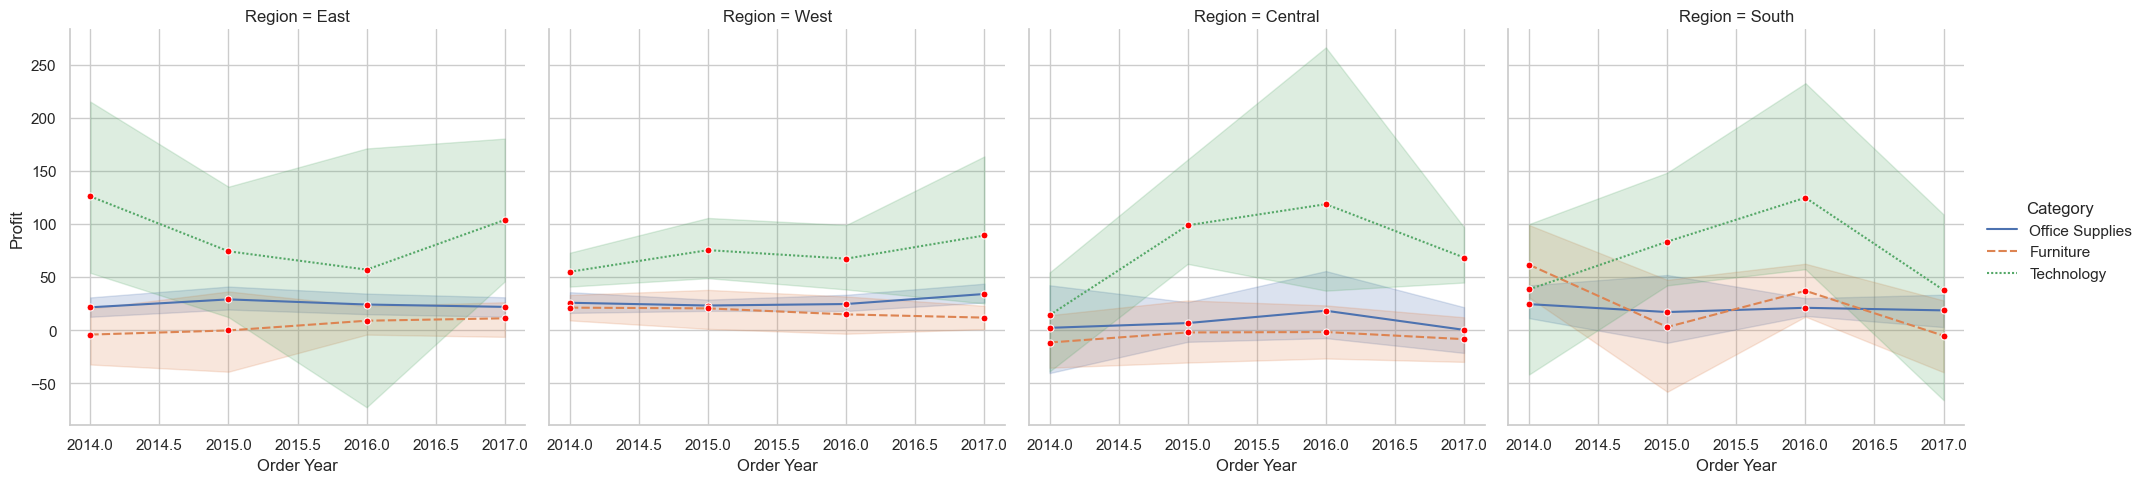

In [24]:
sns.set(style='whitegrid')
sns.relplot(
    data=df, x="Order Year", y="Profit",
    col="Region", hue="Category", style="Category",
    kind="line", marker='o', markerfacecolor='red', markersize=5
)

* Kategori produk yang paling banyak menghasilkan profit karena seringnya terdapat orderan adalah kategori teknologi baik di region East, West, Central dan South
* Sedangkan produk furniture paling sedikit diorder di region East, West, dan Central adalah Furniture. Sedangkan di Region South barang dengan kategori furniture di tahun 2014 dan tahun 2016 sempat lebih diminati daripada barang dengan kategori office supplies

#### Bagaimana perbandingan Sales dan Profit setiap bulannya?

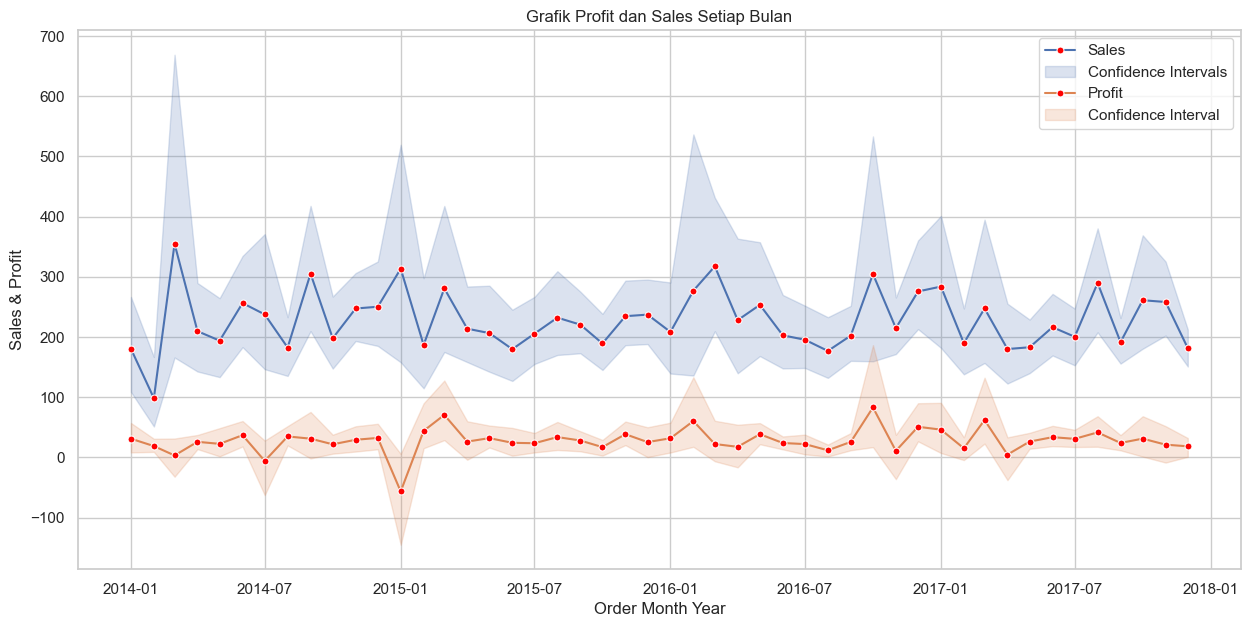

In [25]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 7))
plt.title('Grafik Profit dan Sales Setiap Bulan')
sns.lineplot(x=df['Order Month Year'], y=df['Sales'], linestyle='-', marker='o', markerfacecolor='red', markersize=5)
sns.lineplot(x=df['Order Month Year'], y=df['Profit'], linestyle='-', marker='o', markerfacecolor='red', markersize=5)
plt.legend(labels=['Sales','Confidence Intervals','Profit','Confidence Interval'])
plt.ylabel('Sales & Profit')
plt.show()

* Ada bulan-bulan yang dimana ketika nilai Sales naik, justru nilai profitnya turun daripada bulan sebelumnya, contohnya pada bulan Januari tahun 2015

#### Sub Category apa yang paling banyak diorder?

In [26]:
A=pd.crosstab(df['Category'],df['Sub-Category']); A

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,0,0,0,0,228,617,0,0,0,957,0,0,0,0,0,0,319
Office Supplies,0,466,796,1523,0,0,0,254,217,0,364,0,1370,0,846,190,0
Technology,775,0,0,0,0,0,68,0,0,0,0,115,0,889,0,0,0


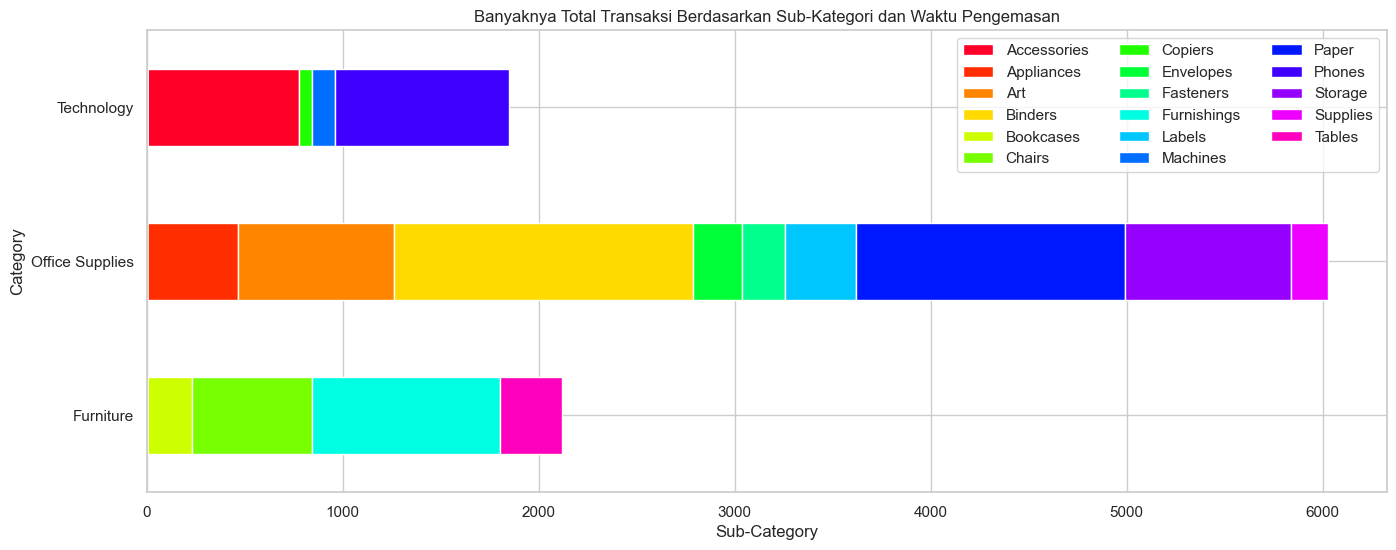

In [27]:
A.plot(kind='barh', 
       stacked=True, 
      figsize=(16, 6),
      colormap='gist_rainbow')
plt.legend(loc="upper right", ncol=3)
plt.title('Banyaknya Total Transaksi Berdasarkan Sub-Kategori dan Waktu Pengemasan')
plt.xlabel("Sub-Category")
plt.ylabel("Category")
plt.show()

* Furnishing menjadi sub-category paling banyak diminati di furniture
* Binders menjadi sub-category paling banyak diminati di office supplies
* Phones menjadi sub-category paling banyak diminati di Technology

#### Berapa hari waktu yang dibutuhkan untuk packing orderan?

In [28]:
B=pd.crosstab(df['Packing Time'],df['Region']); B

Region,Central,East,South,West
Packing Time,,,,
0,116,155,82,166
1,60,84,66,159
2,270,413,198,453
3,218,305,177,305
4,693,795,454,832
5,523,600,359,687
6,315,345,180,363
7,128,151,104,238


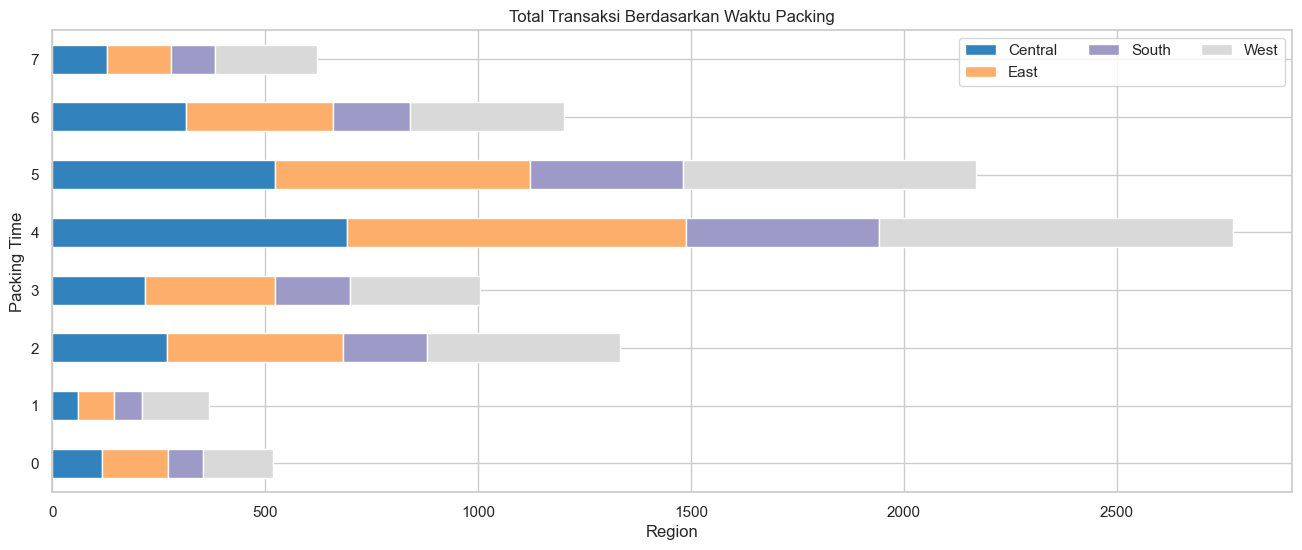

In [29]:
B.plot(kind='barh', 
       stacked=True, 
      figsize=(16, 6),
      colormap='tab20c')
plt.legend(loc="upper right", ncol=3)
plt.title('Total Transaksi Berdasarkan Waktu Packing')
plt.ylabel("Packing Time")
plt.xlabel("Region")
plt.show()

* Waktu packing untuk orderan dari 0 hingga 7 hari dimana kebanyakan transaksi dipacking selama 4 hari
* Banyak barang yang dipacking lebih dari 4 hari
* Orderan dengan waktu packing paling lama yaitu 7 hari, banyak terdapat di Region West

# Preprocessing Modeling

#### Menghapus Outlier

Sales              AxesSubplot(0.125,0.747241;0.133621x0.132759)
Quantity        AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Discount         AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Profit          AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Order Year      AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Order Day          AxesSubplot(0.125,0.587931;0.133621x0.132759)
Packing Time    AxesSubplot(0.285345,0.587931;0.133621x0.132759)
dtype: object

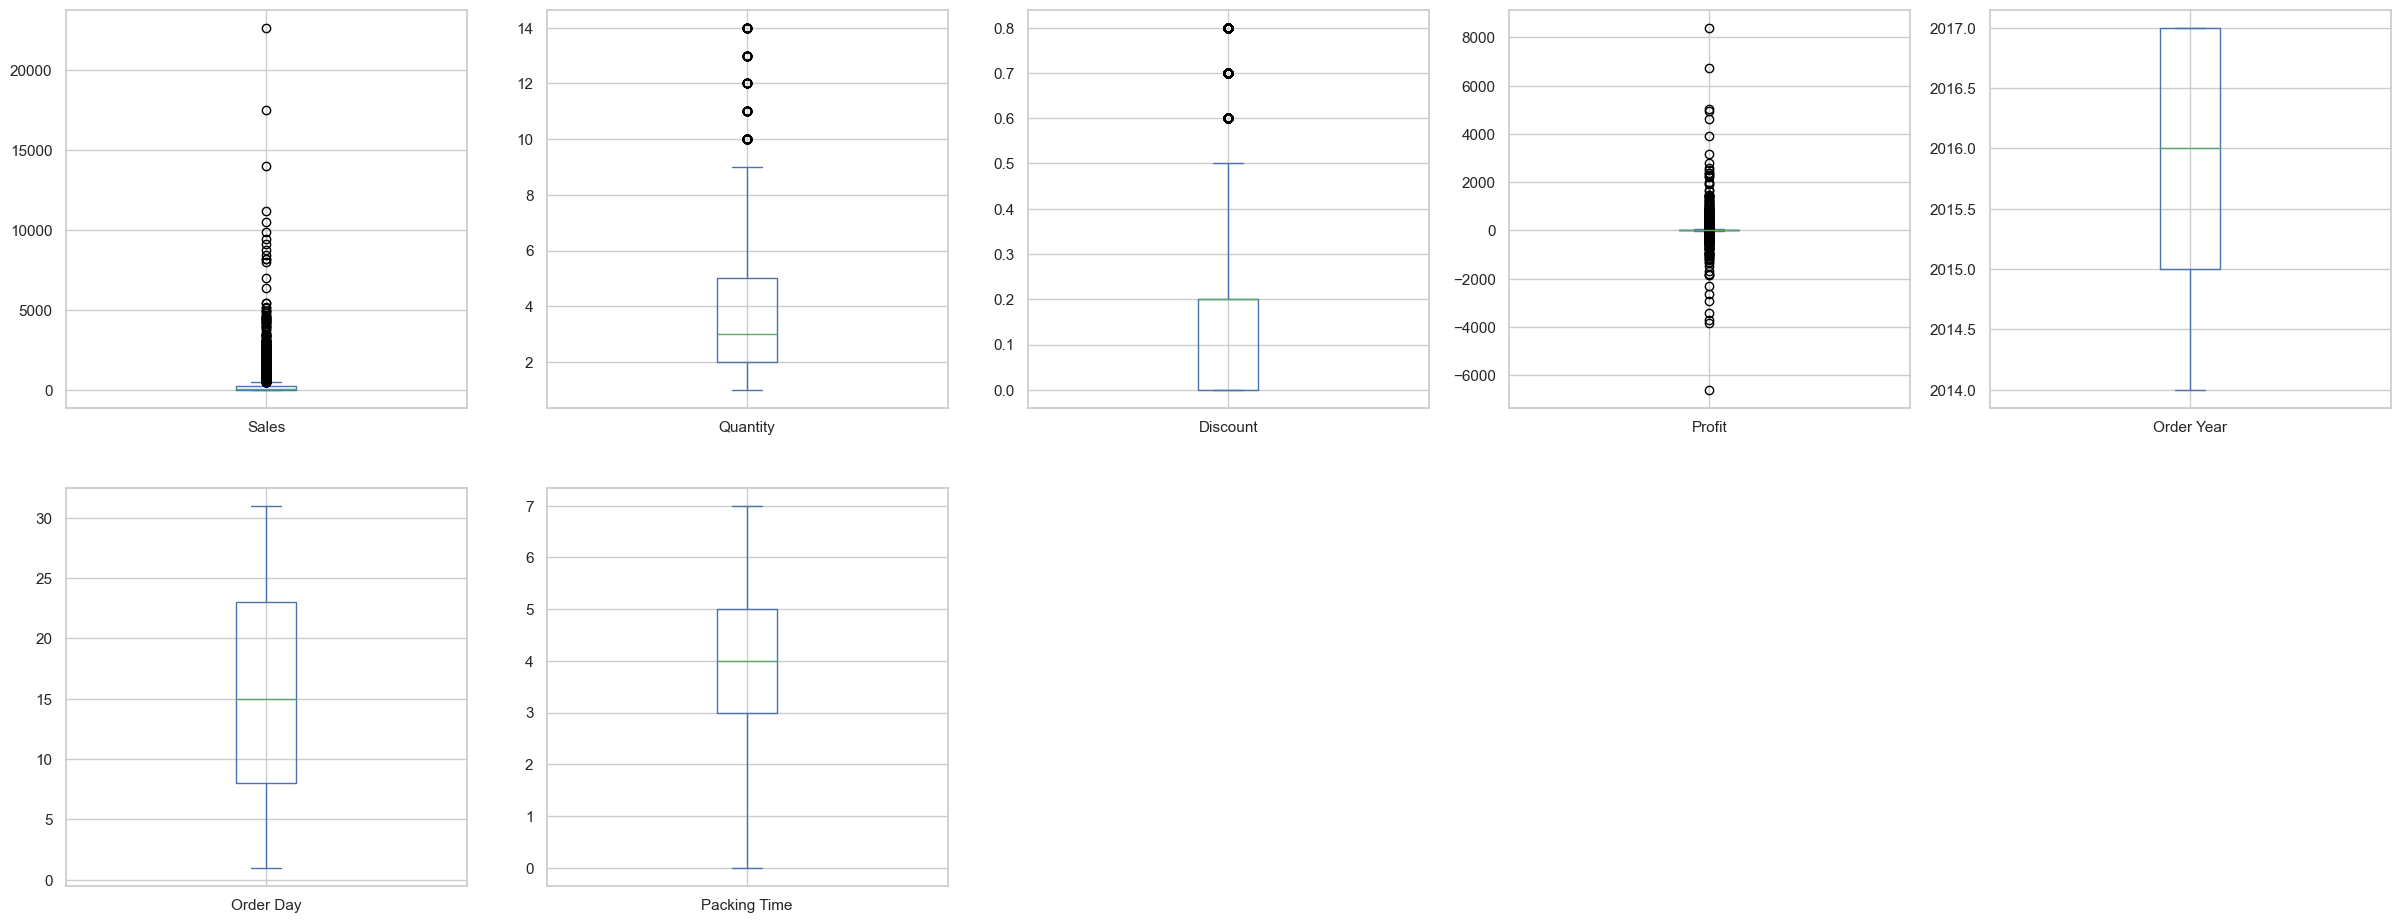

In [30]:
df.plot(kind='box', subplots=True, figsize=(30,30), layout=(5,5))

In [31]:
print("Ukuran data lama: ", df.shape[0])

Ukuran data lama:  9994


* Nilai ambang batas outlier dipilih yang umumnya 3.0. Karena 99,7% titik data terletak di antara +/- 3 standar deviasi

In [32]:
z= np.abs(stats.zscore(df._get_numeric_data()))
#mendapatkan data yang tidak outlier pada semua variabel
df=df[(z<3).all(axis=1)]
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Month Year,Packing Time
113,US-2016-141544,2016-08-30,2016-09-01,First Class,PO-18850,Patrick O'Brill,Consumer,United States,Philadelphia,Pennsylvania,...,Round Specialty Laser Printer Labels,100.24,10,0.2,33.8310,2016,August,30,2016-08-01,2
114,CA-2014-122336,2014-04-13,2014-04-17,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,Philadelphia,Pennsylvania,...,Fellowes PB200 Plastic Comb Binding Machine,509.97,10,0.7,-407.9760,2014,April,13,2014-04-01,4
115,US-2014-119137,2014-07-23,2014-07-27,Standard Class,AG-10900,Arthur Gainer,Consumer,United States,Tucson,Arizona,...,Microsoft Natural Keyboard Elite,479.04,10,0.2,-29.9400,2014,July,23,2014-07-01,4
116,CA-2017-138611,2017-11-14,2017-11-17,Second Class,CK-12595,Clytie Kelty,Consumer,United States,Grove City,Ohio,...,PureGear Roll-On Screen Protector,119.94,10,0.4,15.9920,2017,November,14,2017-11-01,3
117,CA-2016-132661,2016-10-23,2016-10-29,Standard Class,SR-20740,Steven Roelle,Home Office,United States,New York City,New York,...,Snap-A-Way Black Print Carbonless Ruled Speed ...,379.40,10,0.0,178.3180,2016,October,23,2016-10-01,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,...,Electrix 20W Halogen Replacement Bulb for Zoom...,13.40,1,0.0,6.4320,2016,December,5,2016-12-01,5
9990,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,...,Easy-staple paper,4.98,1,0.0,2.3406,2016,December,5,2016-12-01,5
9991,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,...,KI Adjustable-Height Table,85.98,1,0.0,22.3548,2015,September,6,2015-09-01,3
9992,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,...,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1,0.0,15.2208,2016,September,29,2016-09-01,4


In [33]:
print("Ukuran data baru: ", df.shape[0])

Ukuran data baru:  9436


Sales              AxesSubplot(0.125,0.747241;0.133621x0.132759)
Quantity        AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Discount         AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Profit          AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Order Year      AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Order Day          AxesSubplot(0.125,0.587931;0.133621x0.132759)
Packing Time    AxesSubplot(0.285345,0.587931;0.133621x0.132759)
dtype: object

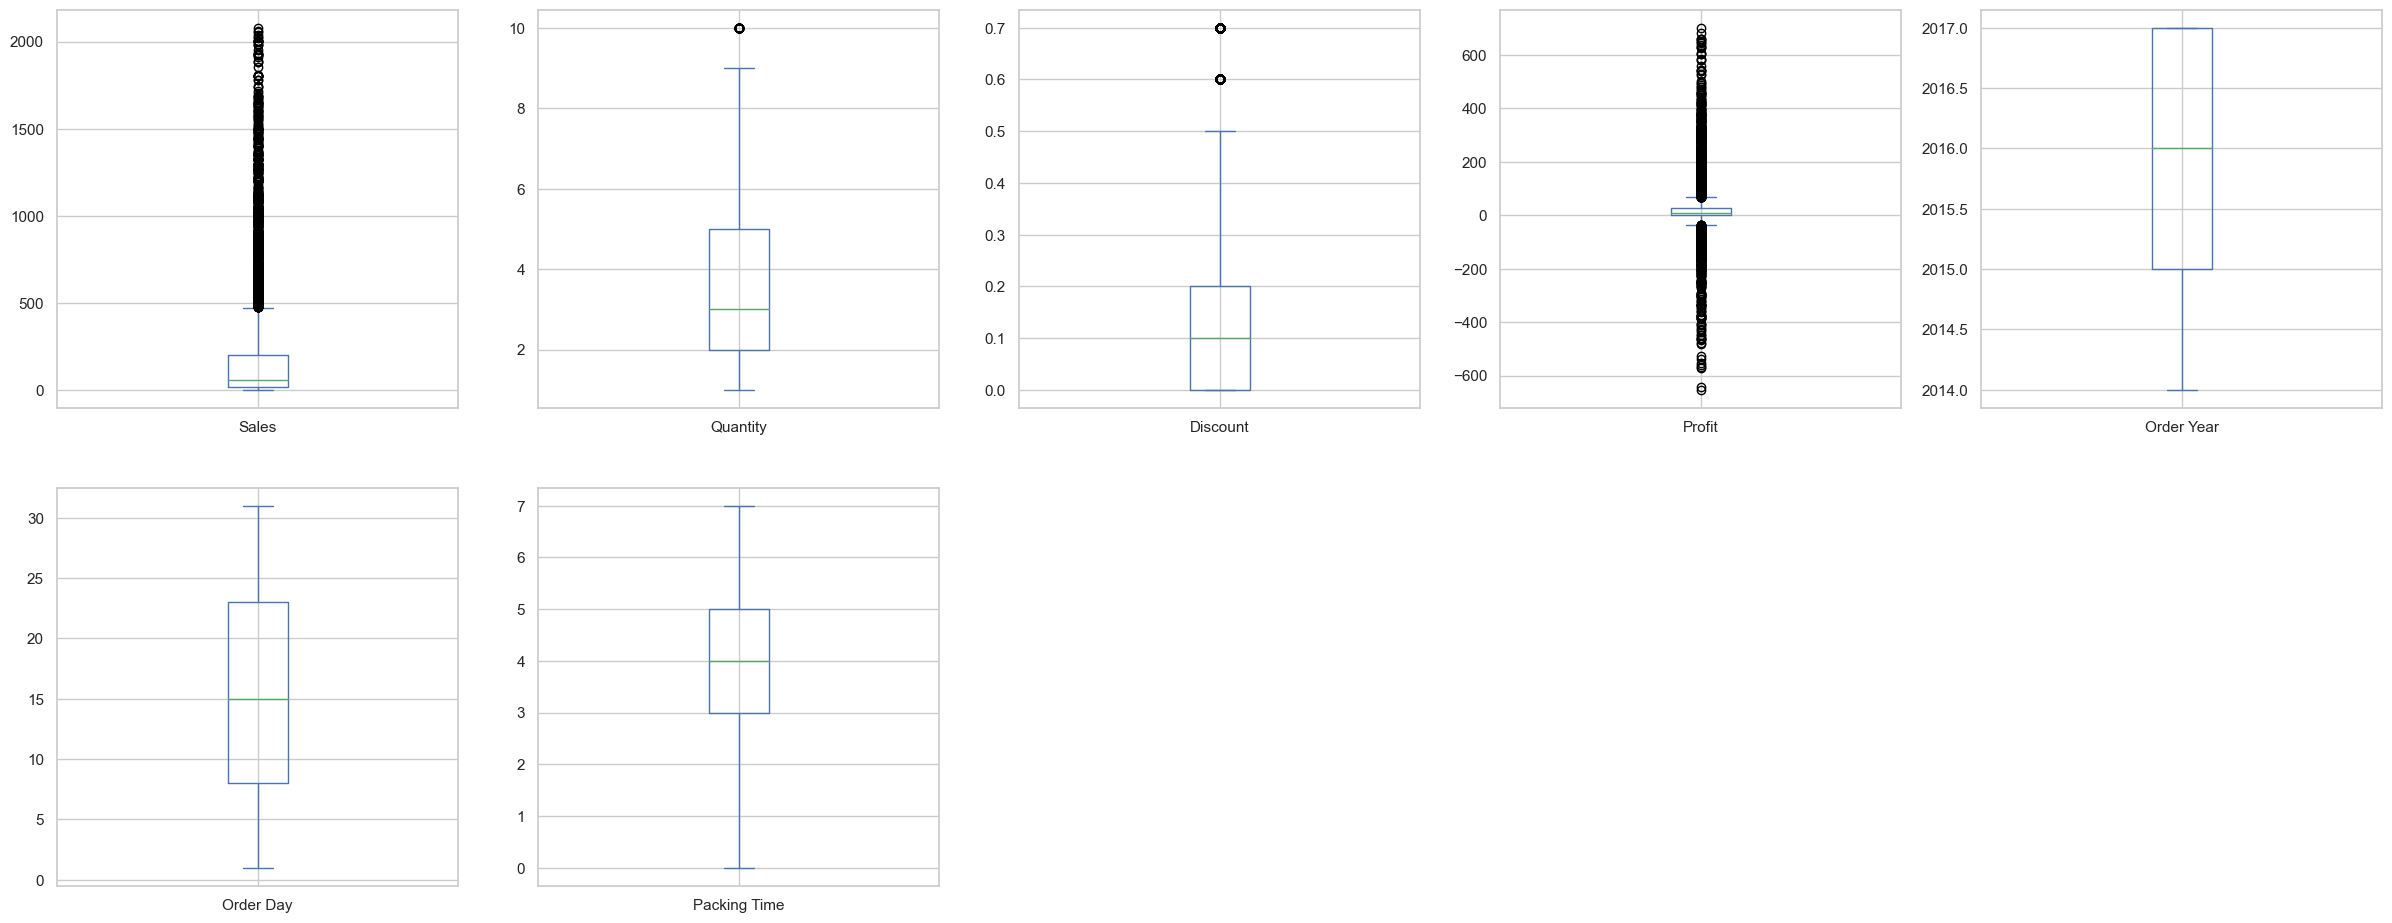

In [34]:
df.plot(kind='box', subplots=True, figsize=(30,30), layout=(5,5))

* penghapusan outlier tidak satu-satu feature mempertimbangkan banyaknya outlier pada Sales dan Profit ketika dihapus semua, maka akan menghapus banyak data pada Quantity

# Feature  Engineering

* menghapus feature yang unik dan juga feature dengan tipe data tanggal

In [35]:
df_encoded = pd.get_dummies(df, columns=['Ship Mode','Segment', 'City','State','Region','Category','Sub-Category','Order Month'], drop_first=True)

In [36]:
df_encoded.head(5)

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Country,Postal Code,Product ID,Product Name,Sales,...,Order Month_December,Order Month_February,Order Month_January,Order Month_July,Order Month_June,Order Month_March,Order Month_May,Order Month_November,Order Month_October,Order Month_September
113,US-2016-141544,2016-08-30,2016-09-01,PO-18850,Patrick O'Brill,United States,19143,OFF-LA-10001074,Round Specialty Laser Printer Labels,100.24,...,0,0,0,0,0,0,0,0,0,0
114,CA-2014-122336,2014-04-13,2014-04-17,JD-15895,Jonathan Doherty,United States,19140,OFF-BI-10003656,Fellowes PB200 Plastic Comb Binding Machine,509.97,...,0,0,0,0,0,0,0,0,0,0
115,US-2014-119137,2014-07-23,2014-07-27,AG-10900,Arthur Gainer,United States,85705,TEC-AC-10002076,Microsoft Natural Keyboard Elite,479.04,...,0,0,0,1,0,0,0,0,0,0
116,CA-2017-138611,2017-11-14,2017-11-17,CK-12595,Clytie Kelty,United States,43123,TEC-PH-10000011,PureGear Roll-On Screen Protector,119.94,...,0,0,0,0,0,0,0,1,0,0
117,CA-2016-132661,2016-10-23,2016-10-29,SR-20740,Steven Roelle,United States,10024,OFF-PA-10000482,Snap-A-Way Black Print Carbonless Ruled Speed ...,379.40,...,0,0,0,0,0,0,0,0,1,0


#### Menghapus feature unik dan feature tanggal

* Feature yang dihapus adalah :
'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Order ID', 'Postal Code', 'Product ID','Country','Product Name', 'Order Day', 'Order Month Year'

In [37]:
dfx = df_encoded.drop(['Order Date','Ship Date', 'Customer ID', 'Customer Name', 'Order ID', 'Postal Code', 'Product ID','Country','Product Name','Order Day', 'Order Month Year'], axis=1)

# Feature Selection

#### Menghapus feature berdasarkan hasil korelasi untuk menghilangkan multikolineritas

* Karena profit dan sales memiliki nilai korelasi paling besar, sehingga diantaranya harus dihapus salah satu. Namun karena sales memiliki hubungan yang erat dengan Quantity, maka yang dipilih dihapus adalah Profit

In [38]:
df2=dfx.drop('Profit', axis=1)

In [39]:
df2

,Sales,Quantity,Discount,Order Year,Packing Time,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,...,Order Month_December,Order Month_February,Order Month_January,Order Month_July,Order Month_June,Order Month_March,Order Month_May,Order Month_November,Order Month_October,Order Month_September
113,100.24,10,0.2,2016,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,509.97,10,0.7,2014,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
115,479.04,10,0.2,2014,4,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
116,119.94,10,0.4,2017,3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
117,379.40,10,0.0,2016,6,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,13.40,1,0.0,2016,5,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9990,4.98,1,0.0,2016,5,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9991,85.98,1,0.0,2015,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9992,36.24,1,0.0,2016,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Modeling

* karena targetnya memiliki tipe data numerik maka model yang lebih cocok digunakan adalah regresi bukan klasifikasi, karena jika klasifikasi menggunakan supervised maka hasil prediksi quantity akan terbatasi di quantity maksimal (yang terdapat pada data) saja yaitu 14. Padahal mungkin saja bisa lebih dari itu. Sedangkan jika menggunakan unsupervised, maka target nya tidak diinputkan, sedangkan disini targetnya adalah Quantity
* train test data menggunakan cross validation karena dirasa lebih menghasilkan nilai MSE yang lebih kecil daripada menggunakan Holdout 0.7 0.3

#### Menggunakan Regresi Linear

In [40]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [41]:
x=x.values
y=y.values

In [42]:
regreslin = LinearRegression()

In [43]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores_regreslin = []
mape_scores_regreslin = []
mae_scores_regreslin = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regreslin.fit(x_train, y_train)
    y_pred = regreslin.predict(x_test)
    mse_scores_regreslin.append(mean_squared_error(y_test, y_pred))
    mape_scores_regreslin.append(mean_absolute_percentage_error(y_test, y_pred))
    mae_scores_regreslin.append(mean_absolute_error(y_test, y_pred))

In [44]:
mse_regreslin=np.mean(mse_scores_regreslin)
mape_regreslin=np.mean(mape_scores_regreslin)
mae_regreslin=np.mean(mae_scores_regreslin)
print("MSE: ", mse_regreslin)
print("MAPE: ", mape_regreslin)
print("MAE: ",mae_regreslin)

MSE:  418316762050553.6
MAPE:  182071.077260961
MAE:  606567.2590624939


In [45]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [46]:
regreslin_coef = pd.DataFrame({'Feature' : x.columns, 'RegresiLinCoef' :
                          regreslin.coef_}).sort_values(by= 'RegresiLinCoef',
                                                   ascending=False)

regreslin_coef['RegresiLinCoef'] = abs(regreslin_coef['RegresiLinCoef'])
regreslin_coef.sort_values(by='RegresiLinCoef', ascending=False)

regreslin_df = regreslin_coef.sort_values(by='RegresiLinCoef', ascending=False).head(50)
regreslin_df = pd.DataFrame({'Regresi Linear Method' : regreslin_df['Feature'].values})
regreslin_df

,Regresi Linear Method
0,Category_Office Supplies
1,Sub-Category_Tables
2,Sub-Category_Chairs
3,Sub-Category_Bookcases
4,Category_Technology
5,Sub-Category_Furnishings
6,City_Las Cruces
7,City_Rio Rancho
8,City_Carlsbad
9,City_Farmington


* Berdasarkan feature importance menggunakan regresi linear, feature yang paling berpengaruh adalah City dan Sub-Category

#### Menggunakan Regresi Lasso

In [47]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [48]:
x=x.values
y=y.values

In [49]:
lasso = Lasso()

In [50]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores_lasso = []
mape_scores_lasso = []
mae_scores_lasso = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    mse_scores_lasso.append(mean_squared_error(y_test, y_pred))
    mape_scores_lasso.append(mean_absolute_percentage_error(y_test, y_pred))
    mae_scores_lasso.append(mean_absolute_error(y_test, y_pred))

In [51]:
mse_lasso=np.mean(mse_scores_lasso)
mape_lasso=np.mean(mape_scores_lasso)
mae_lasso=np.mean(mae_scores_lasso)
print("MSE: ", mse_lasso)
print("MAPE: ", mape_lasso)
print("MAE: ",mae_lasso)

MSE:  3.7808107087164493
MAPE:  0.5929736044557934
MAE:  1.557059249969979


In [52]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [53]:
lasso_coef = pd.DataFrame({'Feature' : x.columns, 'LassoCoef' :
                          lasso.coef_}).sort_values(by= 'LassoCoef',
                                                   ascending=False)

lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])
lasso_coef.sort_values(by='LassoCoef', ascending=False)

lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(5)
lasso_df = pd.DataFrame({'Lasso Method' : lasso_df['Feature'].values})
lasso_df

,Lasso Method
0,Sales
1,Segment_Corporate
2,City_Ann Arbor
3,City_Andover
4,Order Year


* Berdasarkan feature importance menggunakan regresi Lasso, feature yang paling berpengaruh adalah Sales, Segment, City, Order Year

#### Menggunakan Regresi Ridge

In [54]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [55]:
x=x.values
y=y.values

In [56]:
ridge=Ridge()

In [57]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores_ridge = []
mape_scores_ridge = []
mae_scores_ridge = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    mse_scores_ridge.append(mean_squared_error(y_test, y_pred))
    mape_scores_ridge.append(mean_absolute_percentage_error(y_test, y_pred))
    mae_scores_ridge.append(mean_absolute_error(y_test, y_pred))

In [58]:
mse_ridge=np.mean(mse_scores_ridge)
mape_ridge=np.mean(mape_scores_ridge)
mae_ridge=np.mean(mae_scores_ridge)
print("MSE: ", mse_ridge)
print("MAPE: ", mape_ridge)
print("MAE: ",mae_ridge)

MSE:  3.784341725084281
MAPE:  0.5769940253811551
MAE:  1.53461381460578


In [59]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [60]:
ridge_coef = pd.DataFrame({'Feature' : x.columns, 'RidgeCoef' :
                          ridge.coef_}).sort_values(by= 'RidgeCoef',
                                                   ascending=False)

ridge_coef['RidgeCoef'] = abs(ridge_coef['RidgeCoef'])
ridge_coef.sort_values(by='RidgeCoef', ascending=False)

ridge_df = ridge_coef.sort_values(by='RidgeCoef', ascending=False).head(50)
ridge_df = pd.DataFrame({'Ridge Method' : ridge_df['Feature'].values})
ridge_df

,Ridge Method
0,Sub-Category_Copiers
1,City_Rogers
2,City_Conroe
3,City_Bartlett
4,City_Bellingham
5,City_Santa Fe
6,City_Canton
7,City_Spokane
8,City_Linden
9,City_Helena


* Berdasarkan feature importance menggunakan regresi ridge, feature yang paling berpengaruh adalah City dan Sub-Category

#### Menggunakan Decision Tree Regressor

In [61]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [62]:
x=x.values
y=y.values

In [63]:
dtr=DecisionTreeRegressor()

In [64]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores_dtr = []
mape_scores_dtr = []
mae_scores_dtr = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtr.fit(x_train, y_train)
    y_pred = dtr.predict(x_test)
    mse_scores_dtr.append(mean_squared_error(y_test, y_pred))
    mape_scores_dtr.append(mean_absolute_percentage_error(y_test, y_pred))
    mae_scores_dtr.append(mean_absolute_error(y_test, y_pred))

In [65]:
mse_dtr=np.mean(mse_scores_dtr)
mape_dtr=np.mean(mape_scores_dtr)
mae_dtr=np.mean(mae_scores_dtr)
print("MSE: ", mse_dtr)
print("MAPE: ", mape_dtr)
print("MAE: ",mae_dtr)

MSE:  5.164627855563743
MAPE:  0.5152787106066791
MAE:  1.5723868558692957


In [66]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [67]:
dtr_importance = pd.DataFrame({'Feature' : x.columns, 'DtrCoef' :
                          dtr.feature_importances_}).sort_values(by= 'DtrCoef',
                                                   ascending=False)

dtr_importance['DtrCoef'] = abs(dtr_importance['DtrCoef'])
dtr_importance.sort_values(by='DtrCoef', ascending=False)

dtr_df = dtr_importance.sort_values(by='DtrCoef', ascending=False).head(5)
dtr_df = pd.DataFrame({'Dtr Method' : dtr_df['Feature'].values})
dtr_df

,Dtr Method
0,Sales
1,Packing Time
2,Discount
3,Order Year
4,Category_Office Supplies


* Berdasarkan feature importance menggunakan decision tree regressor, feature yang paling berpengaruh adalah Sales, Order Year, Packing Time, Discount, dan Category

#### Menggunakan Regresi XGBoost 

In [68]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [69]:
x=x.values
y=y.values

In [70]:
xgb=XGBRegressor()

In [71]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores_xgb = []
mape_scores_xgb = []
mae_scores_xgb = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    mse_scores_xgb.append(mean_squared_error(y_test, y_pred))
    mape_scores_xgb.append(mean_absolute_percentage_error(y_test, y_pred))
    mae_scores_xgb.append(mean_absolute_error(y_test, y_pred))

In [72]:
mse_xgboost=np.mean(mse_scores_xgb)
mape_xgboost=np.mean(mape_scores_xgb)
mae_xgboost=np.mean(mae_scores_xgb)
print("MSE: ", mse_xgboost)
print("MAPE: ", mape_xgboost)
print("MAE: ",mae_xgboost)

MSE:  3.124232218455176
MAPE:  0.47959014884238726
MAE:  1.3458363446898167


In [73]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [74]:
xgb_importance = pd.DataFrame({'Feature' : x.columns, 'XgbCoef' :
                          xgb.feature_importances_}).sort_values(by= 'XgbCoef',
                                                   ascending=False)

xgb_importance['XgbCoef'] = abs(xgb_importance['XgbCoef'])
xgb_importance.sort_values(by='XgbCoef', ascending=False)

xgb_df = xgb_importance.sort_values(by='XgbCoef', ascending=False).head(15)
xgb_df = pd.DataFrame({'Xgboost Method' : xgb_df['Feature'].values})
xgb_df

,Xgboost Method
0,Category_Office Supplies
1,Sub-Category_Storage
2,Sub-Category_Copiers
3,Sub-Category_Fasteners
4,Sub-Category_Furnishings
5,City_Tucson
6,Sub-Category_Labels
7,Sub-Category_Appliances
8,Region_West
9,Region_South


* Berdasarkan feature importance menggunakan XGBoost Regression, feature yang paling berpengaruh adalah Category, Sub-Category, Region, City,dan Sales

# Evaluasi Model Terbaik

In [75]:
model = pd.DataFrame({
    'Model':['Regresi Linear','Regresi Lasso','Regresi Ridge', 'Decision Tree Regressor','Regresi XGBoost'],
    'Score MSE' : [mse_regreslin, mse_lasso, mse_ridge, mse_dtr, mse_xgboost],
    'Score MAPE' : [mape_regreslin, mape_lasso, mape_ridge, mape_dtr, mse_xgboost],
    'Score MAE' : [mae_regreslin, mae_lasso, mae_ridge, mae_dtr, mae_xgboost]
})
model.sort_values(by='Score MSE', ascending=True)

,Model,Score MSE,Score MAPE,Score MAE
4,Regresi XGBoost,3.124232e+00,3.124232,1.345836
1,Regresi Lasso,3.780811e+00,0.592974,1.557059
2,Regresi Ridge,3.784342e+00,0.576994,1.534614
3,Decision Tree Regressor,5.164628e+00,0.515279,1.572387
0,Regresi Linear,4.183168e+14,182071.077261,606567.259062


* Model yang memiliki nilai MSE paling kecil adalah model Regresi XGBoost, sehingga yang menjadi model paling cocok untuk memprediksi Quantity adalah Metode XGBoost Regresi

#### Hyperparameter Tuning Model Terbaik

In [76]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']
x=x.values
y=y.values

In [77]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [78]:
parameters= { 'objective': ['reg:squarederror','reg:squaredlogerror','multi:softmax'],
              'booster': ['gbtree','gblinear', None],
              'max_depth': [3, 4, 5]}

In [79]:
grid=GridSearchCV(estimator=xgb, param_grid=parameters, cv=3)

In [80]:
best_model = grid.fit(x_train,y_train)

In [81]:
best_model.best_params_

{'booster': 'gbtree', 'max_depth': 3, 'objective': 'reg:squaredlogerror'}

#### Membangun model XGBoost baru dengan parameter terbaik

In [82]:
xgb_new=XGBRegressor(booster='gbtree', objective='reg:squaredlogerror',max_depth=3)

In [83]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores_xgb_new = []
mape_scores_xgb_new = []
mae_scores_xgb_new = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb_new.fit(x_train, y_train)
    y_pred = xgb_new.predict(x_test)
    mse_scores_xgb_new.append(mean_squared_error(y_test, y_pred))
    mape_scores_xgb_new.append(mean_absolute_percentage_error(y_test, y_pred))
    mae_scores_xgb_new.append(mean_absolute_error(y_test, y_pred))

In [84]:
mse_xgboost_new=np.mean(mse_scores_xgb_new)
mape_xgboost_new=np.mean(mape_scores_xgb_new)
mae_xgboost_new=np.mean(mae_scores_xgb_new)
print("MSE: ", mse_xgboost_new)
print("MAPE: ", mape_xgboost_new)
print("MAE: ",mae_xgboost_new)

MSE:  3.103504449556716
MAPE:  0.42326716135214904
MAE:  1.3010796945248555


#### Komparasi hasil evaluasi model XGBoost lama dan baru

In [85]:
comp = pd.DataFrame({
    'Model Regresi XGBoost':['Tanpa Hyperparameter Tuning', 'Dengan Hyperparameter Tuning'],
    'Score MSE' : [mse_xgboost, mse_xgboost_new],
    'Score MAPE' : [mse_xgboost, mape_xgboost_new],
    'Score MAE' : [mae_xgboost, mae_xgboost_new]
})
comp.sort_values(by='Score MSE', ascending=True)

,Model Regresi XGBoost,Score MSE,Score MAPE,Score MAE
1,Dengan Hyperparameter Tuning,3.103504,0.423267,1.301080
0,Tanpa Hyperparameter Tuning,3.124232,3.124232,1.345836


* Model terbaik berdasarkan nilai MSE yang terkecil adalah Regresi XGBoost dengan hyperparameter tuning

#### Melihat feature yang paling berpengaruh pada model terbaik

In [86]:
x = df2.drop(['Quantity'],axis=1)
y = df2['Quantity']

In [87]:
xgb_importance_new = pd.DataFrame({'Feature' : x.columns, 'XgbCoef' :
                          xgb_new.feature_importances_}).sort_values(by= 'XgbCoef',
                                                   ascending=False)

xgb_importance_new['XgbCoef'] = abs(xgb_importance_new['XgbCoef'])
xgb_importance_new.sort_values(by='XgbCoef', ascending=False)

xgb_new_df = xgb_importance_new.sort_values(by='XgbCoef', ascending=False).head(15)
xgb_new_df = pd.DataFrame({'Xgboost Method' : xgb_new_df['Feature'].values})
xgb_new_df

,Xgboost Method
0,Category_Office Supplies
1,Sub-Category_Storage
2,Sales
3,Sub-Category_Chairs
4,Sub-Category_Paper
5,Category_Technology
6,Sub-Category_Art
7,Sub-Category_Tables
8,Sub-Category_Furnishings
9,Sub-Category_Fasteners


* Berdasarkan model terbaik, 4 feature paling berpengaruh terhadap quantity adalah Category, Sales, Sub-Category, dan Discount

#### Pengujian residual

In [88]:
y_pred = xgb_new.predict(x_test)

In [89]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
0,10,4.819739
1,10,3.352009
2,10,3.790164
3,9,6.367125
4,9,4.322271
...,...,...
938,1,2.106675
939,1,1.706428
940,1,1.059583
941,1,1.982052


In [90]:
result['Predict']=result['Predict'].apply(np.ceil).astype('int')
result['Residual']=result['Predict']-result['Actual']

In [91]:
result.insert(0, 'Nomer', range(1, 1 + len(result)))

In [92]:
result

,Nomer,Actual,Predict,Residual
0,1,10,5,-5
1,2,10,4,-6
2,3,10,4,-6
3,4,9,7,-2
4,5,9,5,-4
...,...,...,...,...
938,939,1,3,2
939,940,1,2,1
940,941,1,2,1
941,942,1,2,1


* Scatter Plot Actual dan Predict

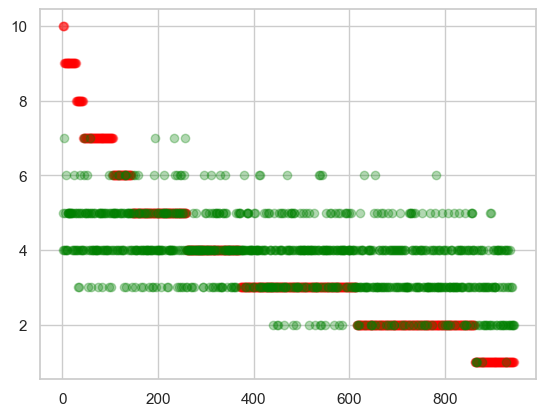

In [93]:
plt.scatter(result['Nomer'],result['Actual'], c='red',alpha=0.3)
plt.scatter(result['Nomer'],result['Predict'], c='green', alpha=0.3)
plt.show()

Hasil nilai predict cenderung tersebar di range 1 hingga 7 barang

* Plot distribusi residual regresi 

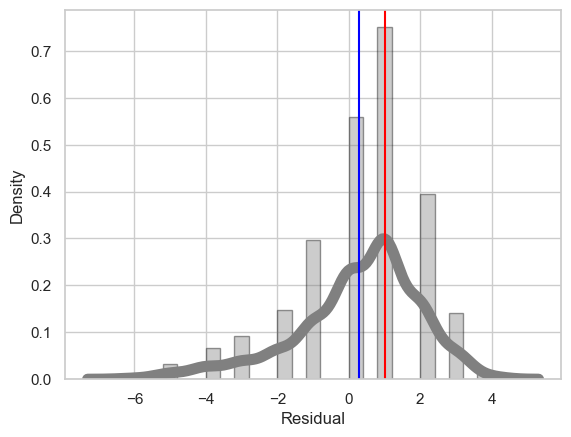

In [94]:
sns.distplot(result['Residual'], hist=True, kde= True, color  ='grey',
            hist_kws= {'edgecolor':'black'},
            kde_kws= {'linewidth':8})
plt.axvline(result['Residual'].mean(), color='blue')
plt.axvline(result['Residual'].median(), color='red')

* Uji normalitas residual data

In [95]:
ksdata = kstest(result['Residual'], 'norm')
ksdata

KstestResult(statistic=0.3609629857292004, pvalue=1.4837619197557984e-110)

Berdasarkan hasil uji normalitas, residual tidak berdistribusi normal karena pval < 0.05. Namun pada XGboost Regression tidak ada asumsi Residual harus independen, identik, dan berdistribusi normal seperti pada regresi linear

#### Prediksi Quantity 6 bulan kedepan (dari data)

* karena data x selain bulan dan tahun tidak diberikan informasi, maka menggunakan data asli untuk prediksi data kedepan

In [96]:
include_noencode = df[df['Order Date'].dt.strftime('%Y-%m') >= '2017-07']

In [97]:
include = df_encoded[df_encoded['Order Date'].dt.strftime('%Y-%m') >= '2017-07']
include.sort_values('Order Date')

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Country,Postal Code,Product ID,Product Name,Sales,...,Order Month_December,Order Month_February,Order Month_January,Order Month_July,Order Month_June,Order Month_March,Order Month_May,Order Month_November,Order Month_October,Order Month_September
3508,US-2017-148362,2017-07-01,2017-07-08,KF-16285,Karen Ferguson,United States,46203,OFF-ST-10001128,"Carina Mini System Audio Rack, Model AR050B",443.920,...,0,0,0,1,0,0,0,0,0,0
9410,US-2017-148362,2017-07-01,2017-07-08,KF-16285,Karen Ferguson,United States,46203,OFF-BI-10003656,Fellowes PB200 Plastic Comb Binding Machine,169.990,...,0,0,0,1,0,0,0,0,0,0
3509,US-2017-148362,2017-07-01,2017-07-08,KF-16285,Karen Ferguson,United States,46203,OFF-PA-10003441,Xerox 226,25.920,...,0,0,0,1,0,0,0,0,0,0
2801,CA-2017-107958,2017-07-02,2017-07-05,AH-10120,Adrian Hane,United States,77036,OFF-PA-10000357,"White Dual Perf Computer Printout Paper, 2700 ...",163.960,...,0,0,0,1,0,0,0,0,0,0
3515,US-2017-111024,2017-07-03,2017-07-06,SZ-20035,Sam Zeldin,United States,43130,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",32.896,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842,CA-2017-126221,2017-12-30,2018-01-05,CC-12430,Chuck Clark,United States,47201,OFF-AP-10002457,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,...,1,0,0,0,0,0,0,0,0,0
5526,CA-2017-156720,2017-12-30,2018-01-03,JM-15580,Jill Matthias,United States,80538,OFF-FA-10003472,Bagged Rubber Bands,3.024,...,1,0,0,0,0,0,0,0,0,0
7003,CA-2017-115427,2017-12-30,2018-01-03,EB-13975,Erica Bern,United States,94533,OFF-BI-10002103,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,...,1,0,0,0,0,0,0,0,0,0
4506,CA-2017-143259,2017-12-30,2018-01-03,PO-18865,Patrick O'Donnell,United States,10009,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,52.776,...,1,0,0,0,0,0,0,0,0,0


In [98]:
include2 = include.drop(['Order Date','Ship Date', 'Customer ID', 'Customer Name', 'Order ID', 'Postal Code', 'Product ID','Country','Product Name','Order Day', 'Order Month Year','Profit'], axis=1)

In [99]:
include2

,Sales,Quantity,Discount,Order Year,Packing Time,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,...,Order Month_December,Order Month_February,Order Month_January,Order Month_July,Order Month_June,Order Month_March,Order Month_May,Order Month_November,Order Month_October,Order Month_September
116,119.940,10,0.4,2017,3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
123,79.920,10,0.2,2017,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
125,11.220,10,0.7,2017,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
126,22.000,10,0.0,2017,7,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
127,31.500,10,0.0,2017,5,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,70.980,1,0.0,2017,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9964,11.540,1,0.0,2017,4,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
9981,6.672,1,0.2,2017,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9988,18.000,1,0.0,2017,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [100]:
x1 = include2.drop(['Quantity'],axis=1)
y1 = include2['Quantity']

In [101]:
ynew = xgb_new.predict(x1)

In [102]:
ynew

array([3.1799438, 3.1589282, 3.7005157, ..., 1.8941425, 2.1163776,
       3.0936623], dtype=float32)

In [103]:
city = include_noencode['City']
month = include_noencode['Order Month']
product_id = include_noencode['Product ID']
result2 = pd.DataFrame({'Actual':y1, 'Quantity':ynew, 'Kota':city, 'Bulan' : month, 'Product ID' : product_id })
result2

,Actual,Quantity,Kota,Bulan,Product ID
116,10,3.179944,Grove City,November,TEC-PH-10000011
123,10,3.158928,Los Angeles,October,TEC-PH-10000702
125,10,3.700516,Springfield,November,OFF-BI-10003196
126,10,4.203640,Lakeville,November,OFF-AR-10001026
127,10,4.399137,San Francisco,October,OFF-LA-10001641
...,...,...,...,...,...
9955,1,3.086174,New York City,September,OFF-ST-10001370
9964,1,2.309257,Wilmington,July,OFF-PA-10003256
9981,1,1.894143,Louisville,August,OFF-PA-10001950
9988,1,2.116378,Florence,September,TEC-AC-10002305


In [104]:
result2['Quantity']=result2['Quantity'].apply(np.ceil).astype('int')

In [105]:
result2.dtypes

Actual         int64
Quantity       int32
Kota          object
Bulan         object
Product ID    object
dtype: object

In [106]:
result2['Bulan'].unique()

array(['November', 'October', 'August', 'July', 'December', 'September'],
      dtype=object)

* Menggunakan nilai tengah untuk group by karena tidak terpengaruh oleh data outlier

# Output 1

In [107]:
output1=result2.groupby(['Bulan', 'Kota'])['Quantity'].median()
output1=pd.DataFrame(output1)
output1

Quantity
Bulan     Kota                 
August    Austin            5.0
          Bedford           4.0
          Bloomington       3.0
          Brentwood         4.0
          Cedar Hill        5.0
...                         ...
September Toledo            4.0
          Tulsa             4.0
          Waterbury         3.0
          Wilmington        4.0
          Woonsocket        4.5

[537 rows x 1 columns]

# Output 2

In [108]:
output2=result2.groupby(['Bulan'])['Quantity'].median()
output2=pd.DataFrame(output2)
output2

,Quantity
Bulan,
August,4.0
December,4.0
July,4.0
November,4.0
October,4.0
September,4.0


# Output 3

In [109]:
result2['Product ID'].nunique()

1207

In [110]:
output3=result2.groupby(['Bulan','Product ID'])['Quantity'].median()
output3=pd.DataFrame(output3)
output3

Quantity
Bulan     Product ID               
August    FUR-BO-10000468       3.0
          FUR-BO-10001798       3.0
          FUR-BO-10003034       3.0
          FUR-CH-10000015       5.0
          FUR-CH-10002017       2.0
...                             ...
September TEC-PH-10004093       3.0
          TEC-PH-10004188       3.0
          TEC-PH-10004536       4.0
          TEC-PH-10004586       5.0
          TEC-PH-10004977       4.0

[1796 rows x 1 columns]

# Output 4

In [111]:
output4=result2.groupby(['Kota','Bulan','Product ID'])['Quantity'].median()
output4=pd.DataFrame(output4)
output4

Quantity
Kota     Bulan     Product ID               
Aberdeen November  OFF-SU-10004661       4.0
Akron    October   FUR-TA-10001539       3.0
                   OFF-ST-10000142       5.0
         September OFF-AR-10002335       4.0
                   OFF-BI-10001634       3.0
...                                      ...
Yonkers  July      FUR-FU-10004018       3.0
                   TEC-PH-10002660       4.0
         November  TEC-AC-10004114       4.0
                   TEC-MA-10003173       4.0
Yuma     October   TEC-MA-10001148       4.0

[1994 rows x 1 columns]